# Loading data

Image data acquired in microscopy are stored in various formats: TIF, LSM, CZI, LIF, ND2
We'll use the imageanalysis kernel we have created earlier and we assume here that we are working in the example folder ( use %cd in the notebook to change directory ).

In [4]:
%cd  C:\Users\jeromeb\Documents\GitHub\Analysis-of-Microscopy-Images-in-Python

C:\Users\jeromeb\Documents\GitHub\Analysis-of-Microscopy-Images-in-Python


In [5]:
import matplotlib.pyplot as plt

## Loading TIF
For loading TIF images, we can use the module tifffile. It also supports LSM (Zeiss), OME-TIF, ImageJ hyperstacks, etc.
If installing modules manually, type in the prompt the command: 
```bash
conda install tifffile
```
Let's load the all content of the file into a numpy array:

In [6]:
import tifffile
filename = '../data/confocal-series.tif'
img = tifffile.imread(filename)
print("The shape of the array is [depth x channels x height x width]", img.shape)
plt.imshow(img[12,1,:,:])
plt.title('A TIF image')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jeromeb\\Documents\\GitHub\\data\\confocal-series.tif'

## Nikon ND2 files
Nikon ND2 files can be loaded using the python module nd2reader (https://rbnvrw.github.io/nd2reader/). The module is available on the channel conda-forge. Add the conda-forge channel using the following command:
```bash
conda config --add channels conda-forge
```
and install it with:
```
conda install nd2reader
```
Now we can read and write files:

{'x': 512, 'y': 512, 't': 1419, 'z': 1419}


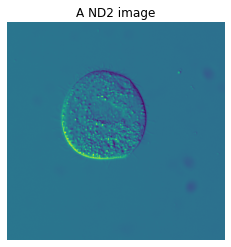

In [50]:
from nd2reader import ND2Reader

with ND2Reader('../data/example.nd2') as images:
  print(images.sizes)
  plt.imshow(images[0])
  plt.title('A ND2 image')
  plt.axis('off')
  plt.show()

## Leica LIF files
For Leila LIF files we can use readlif https://pypi.org/project/readlif/ . This module needs to be installed using pip instead of conda using 
```
pip install readlif
```
Now let's read a LIF file.

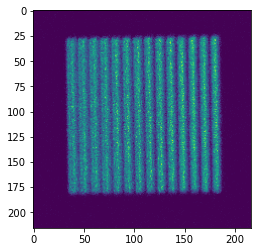

In [51]:
from readlif.reader import LifFile

new = LifFile('../data/example.lif')
img_0 = new.get_image(0)
plt.imshow(img_0.get_frame(z=0, t=0, c=0))

In [ ]:
## Zeiss CZI files
Another format that you may encounter is the Zeiss CZI file format. You can install the czifile module using:

In [25]:
%conda install -y -c conda-forge czifile

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Let's open now a CZI file:


In [2]:
import czifile
image = imread('../data/example.czi')
plt.imshow(image[0,0,0,])


NameError: name 'imread' is not defined

We can also use the module from the Allen Institute: aicspylibczi:
```
pip install  aicspylibczi
```

In [1]:
import numpy as np
from aicspylibczi import CziFile
from pathlib import Path
import matplotlib.pyplot as plt

pth = Path('../example.czi')
czi = CziFile(pth)

FileNotFoundError: [WinError 2] The system cannot find the file specified: '20190610_S02-02.czi'

## Using bioformat
Bioformat-python enable to load most image format using javabridge and bioformat. We can install bioformat-python with pip but you'll need to install Oracle JDK 1.6 or later first (https://www.oracle.com/uk/java/technologies/javase-jdk15-downloads.html).
```
pip install python-bioformat
```
Now let's open an image using bioformat. We need to start a virtual machine first and not forget to stop it when finished.


In [23]:
import javabridge
import bioformats 
javabridge.start_vm(class_path=bioformats.JARS)
img = bioformats.load_image('../data/confocal-series.tif',c=0,z=0,t=0)
javabridge.kill_vm()
plt.imshow(img)

Traceback (most recent call last):
  File "C:\Users\jeromeb\.conda\envs\imageanalysis\lib\site-packages\javabridge\jutil.py", line 286, in start_thread
    env = vm.create(args)
  File "_javabridge.pyx", line 654, in _javabridge.JB_VM.create
RuntimeError: Failed to create Java VM. Return code = -5
Failed to create Java VM


RuntimeError: Failed to start Java VM